1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score

2. Load dataset

In [13]:
df=pd.read_csv('/content/data.csv')


 Drop unused columns

In [14]:
df = df.drop(columns=['id', 'Unnamed: 32'])

Convert target to binary (M=1, B=0)

In [15]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})


 Features & target


In [16]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

Train/Test split


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Standardize features

In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fit Logistic Regression model

In [19]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

6. Predictions

In [8]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

7. Evaluation

In [20]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_prob))

Confusion Matrix:
 [[ 1 70]
 [41  2]]

Classification Report:
               precision    recall  f1-score   support

           0       0.02      0.01      0.02        71
           1       0.03      0.05      0.03        43

    accuracy                           0.03       114
   macro avg       0.03      0.03      0.03       114
weighted avg       0.03      0.03      0.02       114

Precision: 0.027777777777777776
Recall: 0.046511627906976744
ROC-AUC Score: 0.0026203734032099564


Plotting

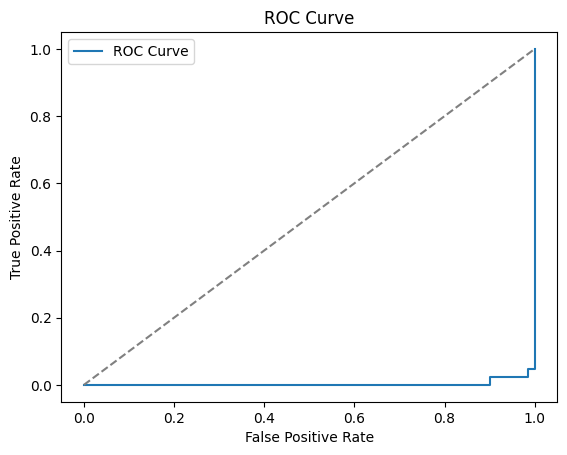

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, label="ROC Curve")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

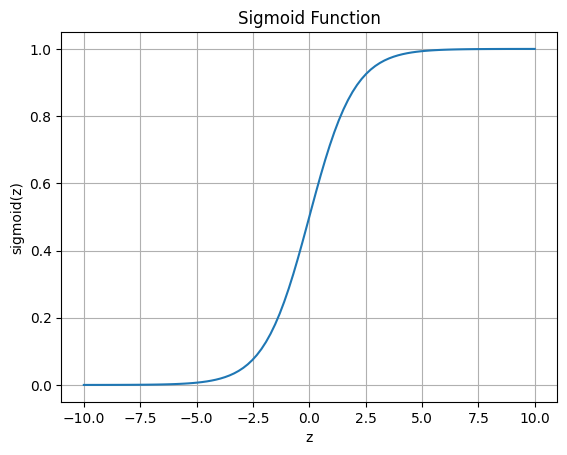

In [22]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()

In [23]:
threshold = 0.4
y_pred_custom = (y_pred_prob >= threshold).astype(int)
print("\nConfusion Matrix (Threshold=0.4):\n", confusion_matrix(y_test, y_pred_custom))
print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))


Confusion Matrix (Threshold=0.4):
 [[ 0 71]
 [41  2]]
Precision: 0.0273972602739726
Recall: 0.046511627906976744
